### **Set up Dependencies**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Data Import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

#for mounting to Drive
from google.colab import drive

#modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics
from sklearn import metrics

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=900e9be49ca8cc3acfa70797b29bcace50da1f14065e18ec224a4be69a0988bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-z406gwtr/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [2]:
#Mount folder to save and retrive output
drive.mount('/content/drive',  force_remount=True)
%cd '/content/drive/My Drive/AI_HW_Test'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/AI_HW_Test


### **Import Data & Discovery**

In [3]:
df_full = pdr.get_data_yahoo("AAPL", start = "2018-01-01").reset_index()
df_full.to_csv("output/AAPL.csv", index = False)

[*********************100%***********************]  1 of 1 downloaded


In [4]:
df_full.shape

(428, 7)

In [5]:
df_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,170.160004,172.300003,169.259995,172.259995,167.701889,25555900
1,2018-01-03,172.529999,174.550003,171.960007,172.229996,167.672668,29517900
2,2018-01-04,172.539993,173.470001,172.080002,173.029999,168.451508,22434600
3,2018-01-05,173.440002,175.369995,173.050003,175.000000,170.369385,23660000
4,2018-01-08,174.350006,175.610001,173.929993,174.350006,169.736588,20567800


In [6]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,428.000000,428.000000,428.000000,428.000000,428.000000,4.280000e+02
mean,189.269603,191.171963,187.492664,189.349767,186.869200,3.192506e+07
std,19.699378,19.786240,19.615980,19.701987,19.931548,1.362092e+07
min,143.979996,145.720001,142.000000,142.190002,140.505798,1.136200e+07
25%,174.087502,175.149994,172.712498,174.240005,171.164211,2.239458e+07
50%,188.365005,189.769997,186.779999,188.525002,185.567421,2.844490e+07
75%,204.292495,206.432495,202.992496,204.507500,203.391636,3.787712e+07
max,230.779999,233.470001,229.779999,232.070007,228.523819,9.624670e+07


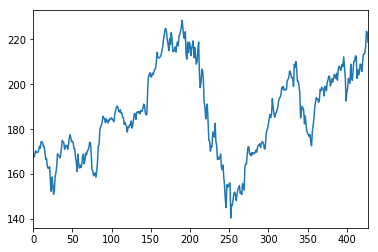

In [7]:
df_full["Adj Close"].plot()

### **Data Processing**

In [0]:
df_full.set_index("Date", inplace = True)

In [0]:
window_size = 32
num_samples = len(df_full) - window_size

#Get indices of access for the data
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size+1).astype(np.int)

data = df_full['Adj Close'].values[indices] #Creates 2D matrix of training sample
x = data[:,:-1] #Each row represents 32 days in the past
y = data[:, -1] #Each output value is the 33rd day

In [0]:
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

### **Modeling**

In [0]:
#Help functions
def get_performance(model_pred):
  #function returns standard performance metrices
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))
  print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, model_pred).round(4)))

def get_plot(model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

### **Baseline**

In [0]:
y_pred_lag = np.roll(y_test, 1)

In [14]:
get_performance(y_pred_lag)

Mean Absolute Error: 2.9604
Mean Squared Error: 27.7842
Root Mean Squared Error 5.271071997231682


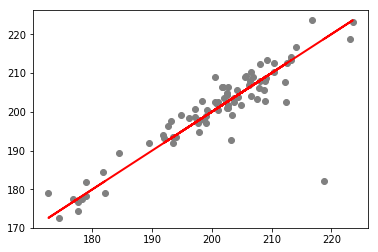

In [15]:
get_plot(y_pred_lag)

### **Linear Regression**

In [16]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_lr = model_lr.predict(x_test)

In [18]:
get_performance(y_pred_lr)

Mean Absolute Error: 2.9299
Mean Squared Error: 13.7611
Root Mean Squared Error 3.7095956652983086


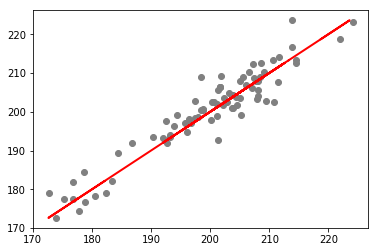

In [19]:
get_plot(y_pred_lr)

### **Method 1: Ridge Regrssion**

In [0]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#Generate Prediction
y_pred_ridge = model_ridge.predict(x_test)

In [22]:
get_performance(y_pred_ridge)

Mean Absolute Error: 2.9297
Mean Squared Error: 13.7587
Root Mean Squared Error 3.7092721658028815


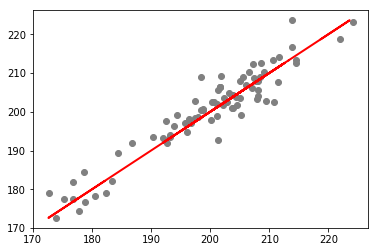

In [23]:
get_plot(y_pred_ridge)

### **Method 2: Gradient Boosting Tree**

In [0]:
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

#Generate Prediction
y_pred_gb = model_gb.predict(x_test)

In [25]:
get_performance(y_pred_gb)

Mean Absolute Error: 3.5118
Mean Squared Error: 17.8982
Root Mean Squared Error 4.230626431156502


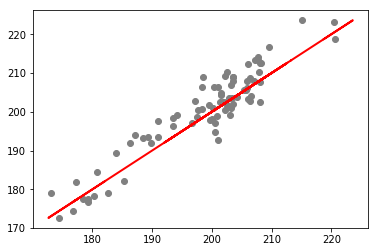

In [26]:
get_plot(y_pred_gb)

### **Comparison**

In [0]:
df_comp = pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag),
                        "lr":np.absolute(y_test-y_pred_lr),
                        "gb":np.absolute(y_test-y_pred_gb)})

(9, 20)

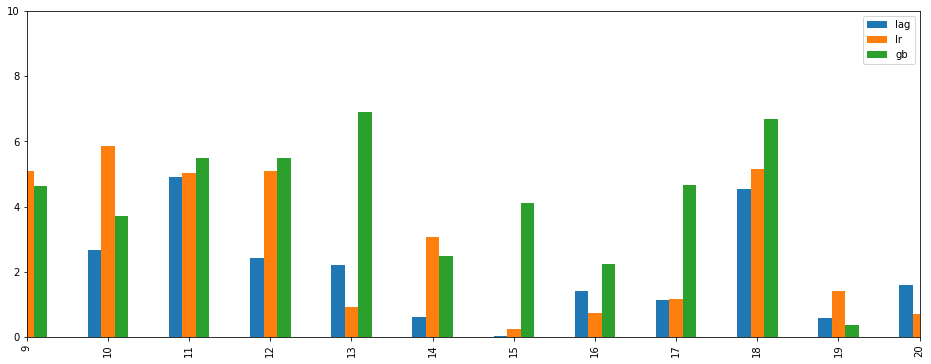

In [28]:
df_comp.plot.bar(figsize=(16,6))
plt.ylim(0,10)
plt.xlim(9,20)